In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [21]:
df.Age.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [22]:
df.Risk.value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [23]:
df.shape

(1000, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [25]:
df.describe(include='all')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [26]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df = df.dropna().reset_index(drop=True)

In [29]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [30]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [31]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [32]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

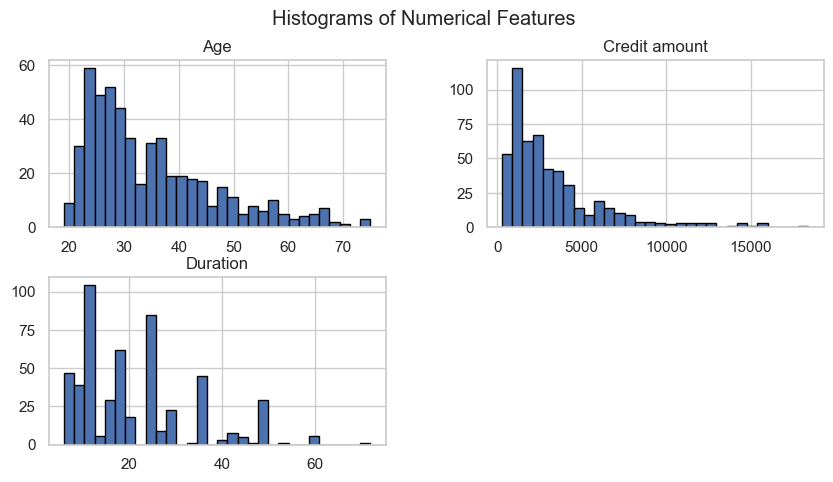

In [33]:
df[["Age", "Credit amount", "Duration"]].hist(bins=30, edgecolor='black', figsize=(10, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

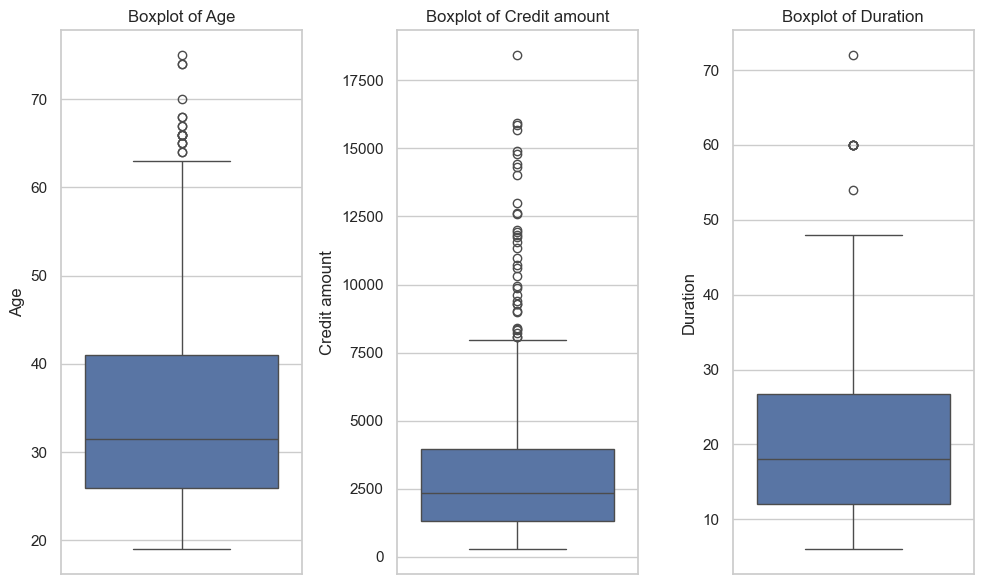

In [34]:
plt.figure(figsize=(10, 6))
for i , col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [35]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [36]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose", "Risk"]

/var/folders/g6/tq_h5zps517b97g9n7chn6hw0000gn/T/ipykernel_1283/3635206947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/g6/tq_h5zps517b97g9n7chn6hw0000gn/T/ipykernel_1283/3635206947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/g6/tq_h5zps517b97g9n7chn6hw0000gn/T/ipykernel_1283/3635206947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/g6/tq_h5zps517b97g9n7chn6hw0000gn/T/ipykernel_1283/3635206947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

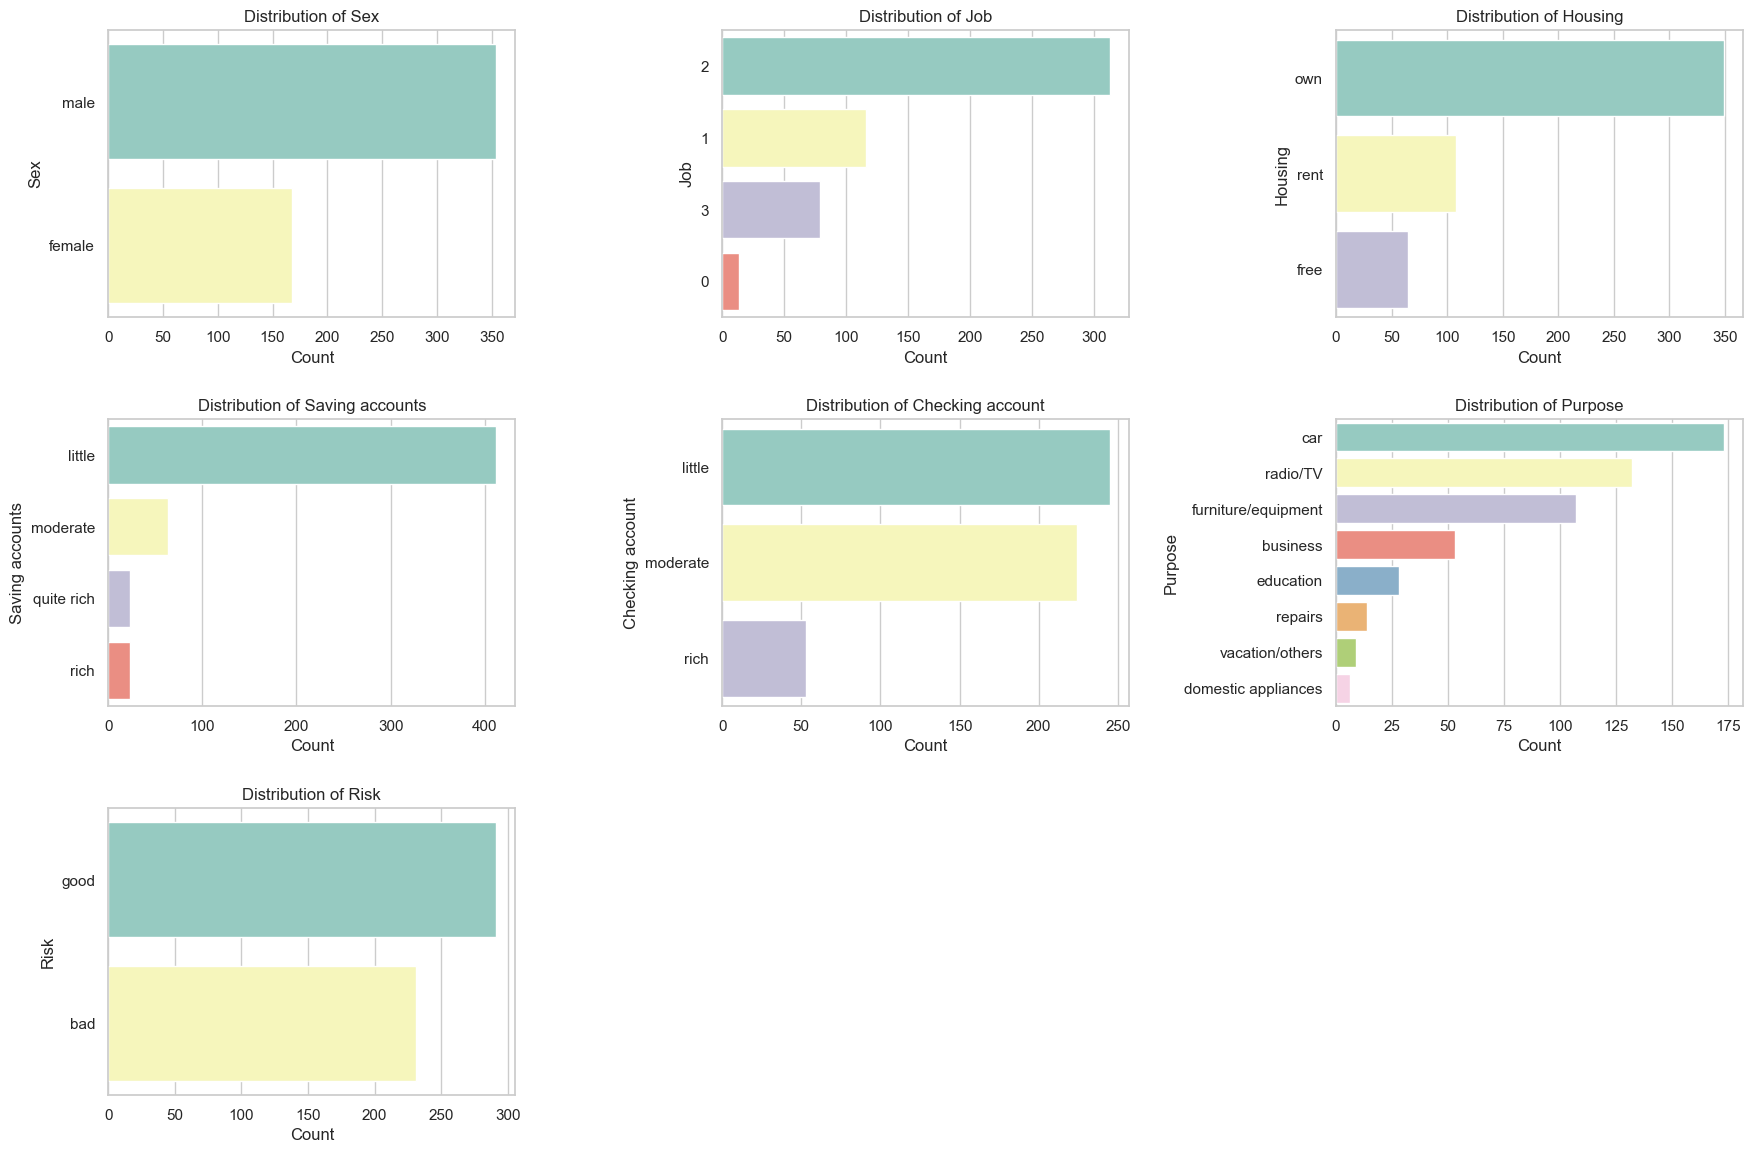

In [37]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    
    sns.countplot(
        data=df,
        y=col,
        palette='Set3',
        order=df[col].value_counts().index
    )
    
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout(pad=2.0)
plt.show()


In [38]:
corr = df[["Age", "Credit amount", "Duration"]].corr()

In [39]:
corr

,Age,Credit amount,Duration
Age,1.000000,0.082014,0.001549
Credit amount,0.082014,1.000000,0.613298
Duration,0.001549,0.613298,1.000000


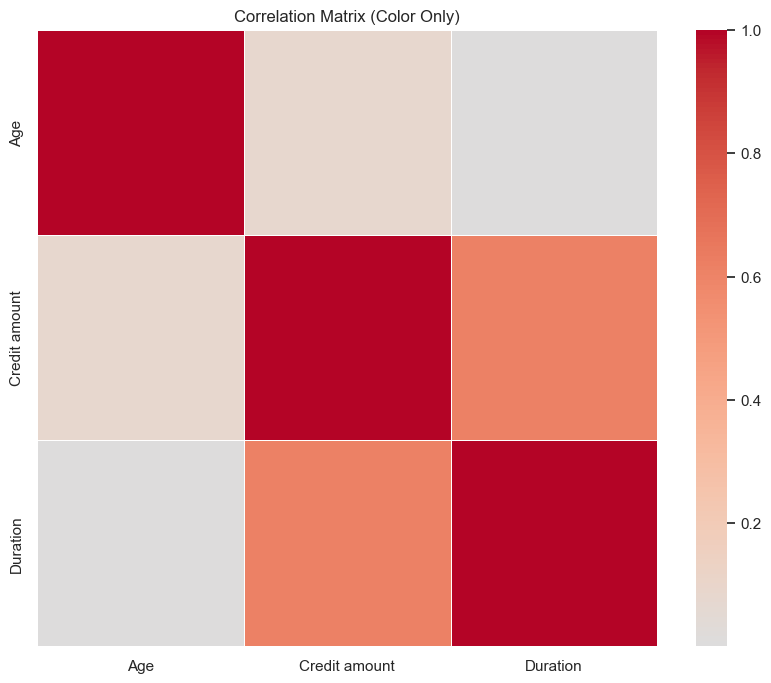

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title('Correlation Matrix (Color Only)')
plt.show()



In [41]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [42]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [43]:
pd.pivot_table(df, values="Credit amount", index = "Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


Text(0.5, 1.0, 'Scatter plot of age vs credit amount')

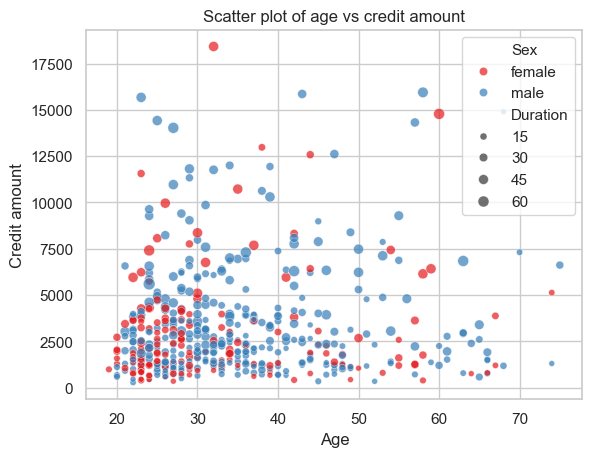

In [44]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", size = "Duration", alpha=0.7, palette='Set1') 
plt.title('Scatter plot of age vs credit amount')

/var/folders/g6/tq_h5zps517b97g9n7chn6hw0000gn/T/ipykernel_1283/1402251174.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x="Saving accounts", y="Credit amount", palette='Set2')


Text(0.5, 1.0, ' Credit amount distribution across saving accounts ')

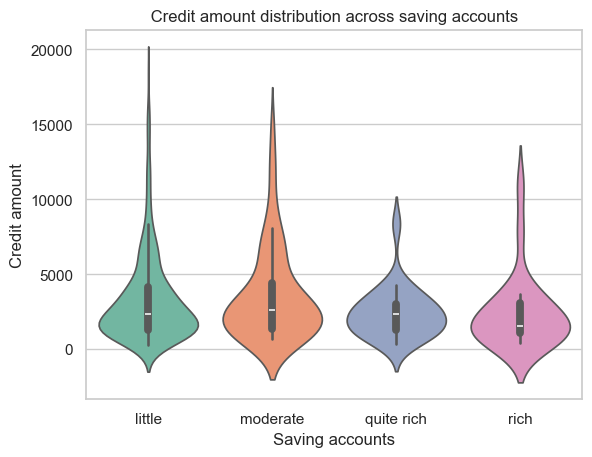

In [45]:
sns.violinplot(data = df, x="Saving accounts", y="Credit amount", palette='Set2')
plt.title(" Credit amount distribution across saving accounts ")

In [46]:
df.Risk.value_counts(normalize=True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

/var/folders/g6/tq_h5zps517b97g9n7chn6hw0000gn/T/ipykernel_1283/1129208833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y=col, data=df, palette='Set1')
/var/folders/g6/tq_h5zps517b97g9n7chn6hw0000gn/T/ipykernel_1283/1129208833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y=col, data=df, palette='Set1')
/var/folders/g6/tq_h5zps517b97g9n7chn6hw0000gn/T/ipykernel_1283/1129208833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk", y=col, data=df, palette='Set1')


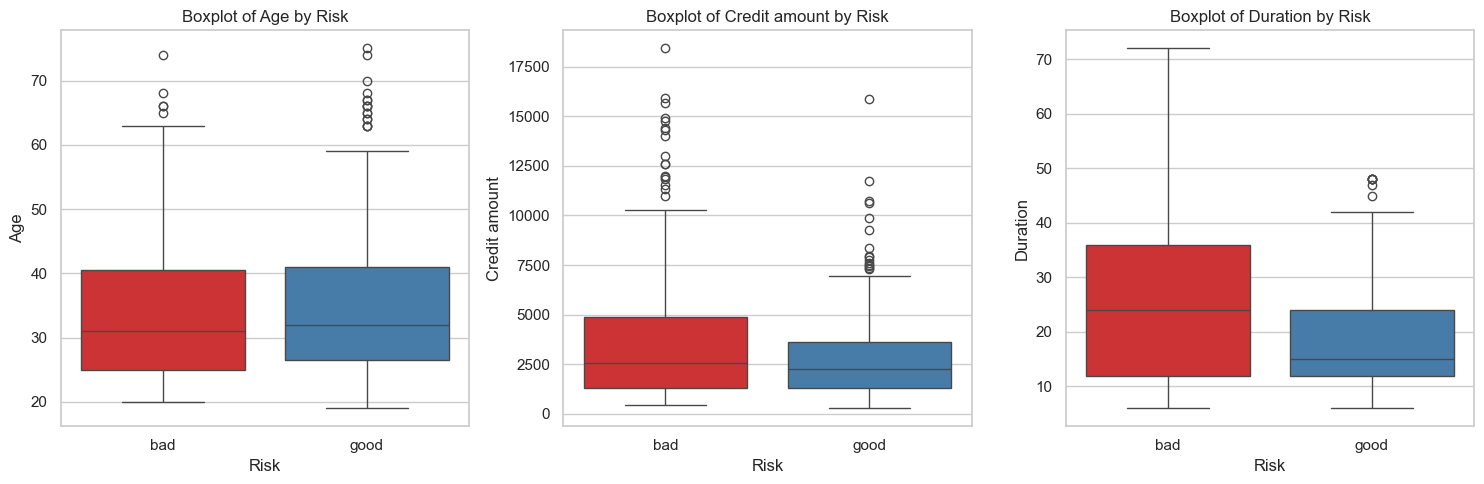

In [47]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x="Risk", y=col, data=df, palette='Set1')
    plt.title(f'Boxplot of {col} by Risk')
plt.tight_layout()
plt.show()

In [48]:
df.groupby("Risk")[["Age", "Credit amount" , "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


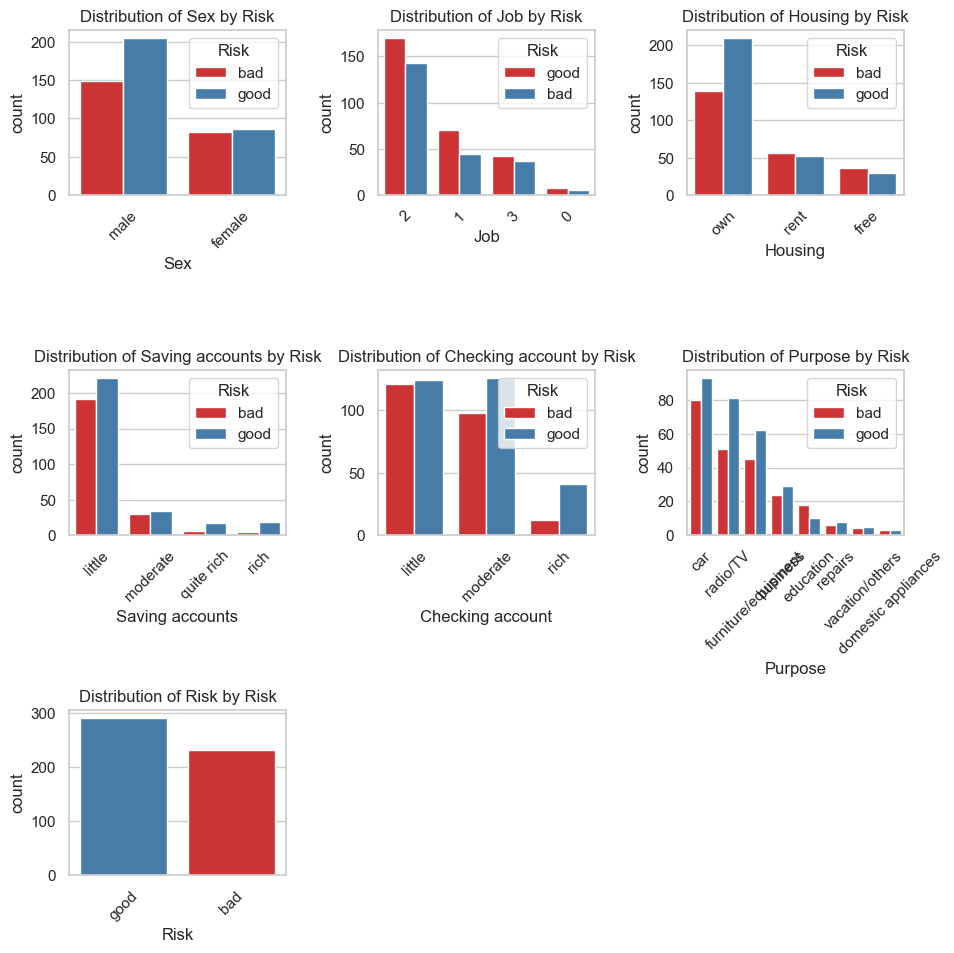

In [49]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(
        data=df,
        x=col,
        hue="Risk",
        palette='Set1',
        order=df[col].value_counts().index)
    plt.title(f'Distribution of {col} by Risk', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout(pad=2.0)
plt.show()



In [50]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [51]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration", "Purpose"]
target = "Risk"
df_model = df[features + [target]]
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad


In [52]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.preprocessing import LabelEncoder
import joblib  

In [54]:
df_model = df.copy()

cat_cols = df_model.select_dtypes(include='object').columns.drop('Risk')



In [55]:
le_dict = {}

In [56]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f'{col}_encoder.pkl')
    

In [57]:
le_target = LabelEncoder()


In [75]:
target

'Risk'

In [76]:
df_model[target] = le_target.fit_transform(df_model[target])


In [60]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [61]:
joblib.dump(le_target, 'target_encoder.pkl')

['target_encoder.pkl']

In [62]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,0,2,1,0,1,5951,48,5,0
1,45,1,2,0,0,0,7882,42,4,1
2,53,1,2,0,0,0,4870,24,1,0
3,35,1,3,2,0,1,6948,36,1,1
4,28,1,3,1,0,1,5234,30,1,0


In [63]:
from sklearn.model_selection import train_test_split


In [64]:
x = df_model.drop(target, axis=1)

In [65]:
y = df_model[target]

In [66]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,22,0,2,1,0,1,5951,48,5
1,45,1,2,0,0,0,7882,42,4
2,53,1,2,0,0,0,4870,24,1
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,1
...,...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24,5
518,30,1,3,1,0,0,3959,36,4
519,40,1,3,1,0,0,3857,30,1
520,23,1,2,0,0,0,1845,45,5


In [67]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1 , stratify=y)

In [69]:
x_train.shape

(417, 9)

In [70]:
x_test.shape

(105, 9)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [72]:
def train_model(model, x_train, param_grid, y_train, x_test, y_test):
    grid = GridSearchCV(model, param_grid={}, cv=5, scoring='accuracy',n_jobs=-1)
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    return best_model, accuracy, grid.best_params_



In [73]:
dt =  DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [77]:
best_dt, acc_dt, params_dt = train_model(dt, x_train, dt_param_grid, y_train, x_test, y_test)

In [79]:
print("Best Decision Tree Model:", best_dt)
print("Decision Tree Accuracy:", acc_dt)
print("Best Decision Tree Parameters:", params_dt)

Best Decision Tree Model: DecisionTreeClassifier(class_weight='balanced', random_state=1)
Decision Tree Accuracy: 0.5142857142857142
Best Decision Tree Parameters: {}


In [80]:
rf = RandomForestClassifier(random_state=1, class_weight='balanced', n_jobs=-1)

In [81]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [83]:
best_rf, acc_rf, params_rf = train_model(rf, x_train, rf_param_grid, y_train, x_test, y_test)

In [84]:
et = ExtraTreesClassifier(random_state=1, class_weight='balanced', n_jobs=-1)

In [85]:
ef_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [93]:
best_et, acc_et, params_et = train_model(et, x_train, ef_param_grid, y_train, x_test, y_test)
print("Best Extra Trees Model:", best_et)
print("Extra Trees Accuracy:", acc_et)
print("Best Extra Trees Parameters:", params_et)


Best Extra Trees Model: ExtraTreesClassifier(class_weight='balanced', n_jobs=-1, random_state=1)
Extra Trees Accuracy: 0.6571428571428571
Best Extra Trees Parameters: {}


In [96]:
xgb = XGBClassifier(random_state=1,scale_pos_weight= (y_train==0).sum()/(y_train==1).sum(),eval_metric='logloss')

In [97]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [99]:
best_xgb, acc_xgb, params_xgb = train_model(
    xgb,
    x_train,
    xgb_param_grid,
    y_train,
    x_test,
    y_test
)

print("XGBoost Accuracy:", acc_xgb)
print("Best Parameters:", params_xgb)


XGBoost Accuracy: 0.6476190476190476
Best Parameters: {}


In [101]:
best_et.predict(x_test)

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [102]:
joblib.dump(best_et, 'best_extra_trees_model.pkl')

['best_extra_trees_model.pkl']